# <span style="color:#2c061f"> Data Science 871: Lecture 5 </span>  

<br>

## <span style="color:#374045"> Data and Stats with Julia </span>


#### <span style="color:#374045"> Lecturer: </span> <span style="color:#d89216"> <br> Dawie van Lill (dvanlill@sun.ac.za) </span>

# Introduction

In this lecture we will start our discussion with how to work with data in Julia. 

Please note that working with data in Julia is going to be different than working with data in R. 

I am just showing basic principles here so that you are aware of them.

If you are more comfortable with R for working with data then you can continue on that path. I am simply offering an alternative. 

In the job market there are a few languages that are used for data analysis. The most popular ones are Stata, R, Python and Julia. 

At this stage Julia is not the most popular for data work, but it shares similarities with Python. 

So if you know Julia well, it will be easy to pick up Python. 

Julia is more popular for work related to numerical / scientific computation, which we will cover in some of the future tutorials. 

In [1]:
import Pkg

In [30]:
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("DataFramesMeta")
Pkg.add("Downloads")
Pkg.add("LinearAlgebra")
Pkg.add("Plots")
Pkg.add("Random")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Chan

In [35]:
using CSV
using DataFrames
using DataFramesMeta
using Downloads
using LinearAlgebra
using Plots
using Random

# Working with data

The primary package for working with data in Julia is `DataFrames.jl`. 

For a comprehensive tutorial series on this package I would recommend Bogumił Kamiński's [Introduction to DataFrames](https://github.com/bkamins/Julia-DataFrames-Tutorial).

# DataFrames basics

In this section we discuss basic principles from the DataFrames package. 

For the first topic we look at how to construct and access DataFrames. 

The fundamental object that we care about is the `DataFrame`. 

This is similar to a `dataframe` that you would find in R or in Pandas (Python).

DataFrames are essentially matrices, with the rows being observations and the columns indicating the variables. 

In [33]:
ENV["LINES"] = 10; # set the max number of lines that will be printed
ENV["COLUMNS"] = 100; # set the max number of columns that will be printed

## Constructors

The easiest thing to construct is an empty DataFrame. 

In [34]:
DataFrame() # empty DataFrame

""
""


You could also construct a DataFrame with different keyword arguments. Notice the different types of the different columns. 

In [36]:
DataFrame(A = 2:5, B = randn(4), C = "Hello")

,A,B,C
,Int64,Float64,String
1,2,-1.44575,Hello
2,3,0.986094,Hello
3,4,-0.61783,Hello
4,5,0.390623,Hello


One of the most common ways to use constructors is through arrays. 

In [37]:
commodities = ["crude", "gas", "gold", "silver"]
last_price = [4.2, 11.3, 12.1, missing] # notice that the last value is missing

df = DataFrame(commod = commodities, price = last_price) # give names to columns

,commod,price
,String,Float64?
1,crude,4.2
2,gas,11.3
3,gold,12.1
4,silver,missing


One can also easily add a new row to an existing `DataFrame` using the `push!` function. 

This is equivalent to adding new observations to the variables. 

In [38]:
new_row = (commod = "nickel", price = 5.1)
push!(df, new_row)

,commod,price
,String,Float64?
1,crude,4.2
2,gas,11.3
3,gold,12.1
4,silver,missing
5,nickel,5.1


One could also use array comprehensions to generate values for the DataFrame,  

In [39]:
DataFrame([rand(3) for i in 1:3], [:x1, :x2, :x3]) # see how we named the columns

,x1,x2,x3
,Float64,Float64,Float64
1,0.470534,0.907618,0.628183
2,0.307489,0.963774,0.893511
3,0.697841,0.41351,0.373177


You can also create a DataFrame from a matrix, 

In [40]:
x = DataFrame(rand(3, 3), :auto) # automatically assign column names

,x1,x2,x3
,Float64,Float64,Float64
1,0.854993,0.343584,0.0928184
2,0.391497,0.668359,0.919769
3,0.298448,0.566436,0.36334


Incidentally, you can convert the DataFrame into a matrix or array if you so wished, 

In [41]:
Matrix(x)

3×3 Matrix{Float64}:
 0.854993  0.343584  0.0928184
 0.391497  0.668359  0.919769
 0.298448  0.566436  0.36334

In the next section we talk about accessing the element of a DataFrame as well as looking at some basic information about the DataFrame that we have on hand.  

## Accessing data 

Once we have our data set up in a DataFrame, we are often going to want to know some basic things about the contents. 

Let us construct a relatively large DataFrame. 

Most of the time we will be working with large datasets in economics, with thousands of rows and columns. 

In [42]:
y = DataFrame(rand(1:10, 1000, 10), :auto);

We can get some basic summary statistics on the data in the DataFrame using the `describe` function. 

In [43]:
describe(y)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,x1,5.737,1,6.0,10,0,Int64
2,x2,5.371,1,5.0,10,0,Int64
3,x3,5.446,1,5.5,10,0,Int64
4,x4,5.481,1,6.0,10,0,Int64
5,x5,5.508,1,6.0,10,0,Int64
6,x6,5.616,1,6.0,10,0,Int64
7,x7,5.575,1,6.0,10,0,Int64
8,x8,5.506,1,5.0,10,0,Int64
9,x9,5.565,1,6.0,10,0,Int64


If we want to take a peak at the first few rows of the data we can use the `first` function. 

In [44]:
first(y, 5) # first 5 rows

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,5,1,8,7,9,10,3,4,7,8
2,6,2,10,7,10,9,4,2,5,7
3,6,8,6,6,8,7,6,3,10,5
4,8,1,4,4,6,7,10,9,2,1
5,2,3,2,6,1,5,5,6,4,6


There are multiple ways to access particular columns of the DataFrame that we have created. 

The most obvious way is to to use `y.col` where `col` stands for the column name. 

This provides us the column in vector format. 

In [45]:
y.x2; # get a single column

Another interesting way to access the column is the following, 

In [46]:
y[!, :x2]; # or y[!, 2] or y[:, :x2]

You can access several columns (the first two in this case) with the following command, 

In [47]:
y[:, [:x1, :x2]];

Getting rows is also quite easy (and similar to the way in which we access rows in arrays), 

In [48]:
y[1, :]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,5,1,8,7,9,10,3,4,7,8


With the code above you can also easily change the values in the DataFrame. 

We could, for example, multiply each of the values in the second column by $2$ if we wanted. 

In [49]:
first(y.x2, 2) # observe first two values in the column

2-element Vector{Int64}:
 1
 2

In [50]:
z = y[!, :x2]; 
z *= 2; # multiply column by two

first(z, 2) # observe newly mutated column

2-element Vector{Int64}:
 2
 4

In [51]:
first(y.x2, 2) # important to note that this is unchanged

2-element Vector{Int64}:
 1
 2

# Importing data

Now let us import some data and play around with it a bit. 

This is generally referred to as data wrangling. 

If you want to become a data scientist, then significant portion of your work is going to involve gathering and cleaning data. 

The analysis part only makes up a small percentage. 

I have created a dataset that is hosted on github at the following location -- https://github.com/DawievLill/Macro-318/blob/main/data/tut2_data.csv

Now let us download this data with Julia. This is one possible way to do it. 

In [79]:
Downloads.download(
    "https://raw.githubusercontent.com/DawievLill/Macro-318/main/data/tut2_data.csv", 
    "05_data.csv"
)

"05_data.csv"

Now get the data into Julia!

In [80]:
sa_data = DataFrame(CSV.File("05_data.csv", dateformat = "yyyy/mm/dd")) # specify the date format

,date,gdp,repo,cpi,inflation
,Date,Int64,Float64,Float64,Float64
1,2004-03-31,1571580,8.0,51.1689,-2.05565
2,2004-06-30,1640953,8.0,51.4474,-2.02507
3,2004-09-30,1674699,7.66667,51.5677,-1.00851
4,2004-12-31,1731000,7.5,51.8483,1.62524
5,2005-03-31,1768828,7.5,52.1796,1.97509
6,2005-06-30,1803783,7.0,52.456,1.9603
7,2005-09-30,1873743,7.0,52.8125,2.41398
8,2005-12-31,1918423,7.0,52.9391,2.10385
9,2006-03-31,1960150,7.0,53.243,2.03793


So we have succesfully imported data into Julia. 

What can we do with this data? 

We see that the data contains information on GDP, the repo rate, CPI and inflation. 

The first thing that we might want to do is visualise the data. 

This is always a good first step. 

After that we might want to look at some basic descriptive statistics, to get an idea of the properties of the data. 

However, before we do that, let us take a look at how to rename columns. 

## Renaming

Two functions can be used to rename columns. 

The `names` function returns column names as a vector of strings, while the `propertynames` function returns a vector of symbols.

In [54]:
names(sa_data)

5-element Vector{String}:
 "date"
 "gdp"
 "repo"
 "cpi"
 "inflation"

In [55]:
propertynames(sa_data)

5-element Vector{Symbol}:
 :date
 :gdp
 :repo
 :cpi
 :inflation

We use the `rename!` function to change column names. 

This function can be used to rename all columns at once.

In [56]:
rename!(sa_data, [:date, :GDP, :interest, :CPI, :infl])

,date,GDP,interest,CPI,infl
,Date,Int64,Float64,Float64,Float64
1,2004-03-31,1571580,8.0,51.1689,-2.05565
2,2004-06-30,1640953,8.0,51.4474,-2.02507
3,2004-09-30,1674699,7.66667,51.5677,-1.00851
4,2004-12-31,1731000,7.5,51.8483,1.62524
5,2005-03-31,1768828,7.5,52.1796,1.97509
6,2005-06-30,1803783,7.0,52.456,1.9603
7,2005-09-30,1873743,7.0,52.8125,2.41398
8,2005-12-31,1918423,7.0,52.9391,2.10385
9,2006-03-31,1960150,7.0,53.243,2.03793


Another option is to rename only some of the columns specified by their names,

In [57]:
rename!(sa_data, :GDP => :gdp, :interest => :repo, :CPI => :cpi, :infl => :inflation)

,date,gdp,repo,cpi,inflation
,Date,Int64,Float64,Float64,Float64
1,2004-03-31,1571580,8.0,51.1689,-2.05565
2,2004-06-30,1640953,8.0,51.4474,-2.02507
3,2004-09-30,1674699,7.66667,51.5677,-1.00851
4,2004-12-31,1731000,7.5,51.8483,1.62524
5,2005-03-31,1768828,7.5,52.1796,1.97509
6,2005-06-30,1803783,7.0,52.456,1.9603
7,2005-09-30,1873743,7.0,52.8125,2.41398
8,2005-12-31,1918423,7.0,52.9391,2.10385
9,2006-03-31,1960150,7.0,53.243,2.03793


# Plotting the data

We will first show how to draw some plots of the data using the `Plots.jl` package.

For us to plot the data let us look at one the variables in the dataset. 

Let us consider GDP, which is the second column in the dataset. 

We can access GDP by calling the variable name, but we can also use the fact that it is located in the second column of the table. 

In [58]:
gdp_1 = sa_data.gdp;
gdp_2 = sa_data[!, 2];
gdp_3 = sa_data[!, :gdp];

We can check whether these variables give the same result as follows, 

In [59]:
gdp_1 == gdp_2 == gdp_3 # check that these give exactly the same result

true

Now let us draw a basic plot of GDP and see if it aligns with your expectation of what GDP would look like in level terms. 

I have used **nominal GDP** in this dataset. 

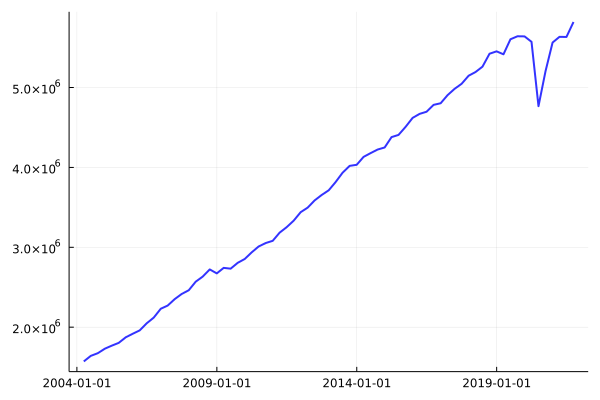

In [61]:
date_sa = sa_data[!, :date]
Plots.plot(date_sa, gdp_1, legend = false, lw = 2, color = :blue, alpha = 0.8)

One of the most popular transformations of GDP data is to take a natural logarithm. 

The reason for this is that differences between adjacent values in the GDP series represent growth rates once the series is "logged".

We will get back to this point at a later stage. If we take a natural log of the series then the plot of GDP looks as follows, 

In [62]:
log_gdp = log.(gdp_1); # remember the dot syntax, since we are broadcasting the log over all the values of GDP

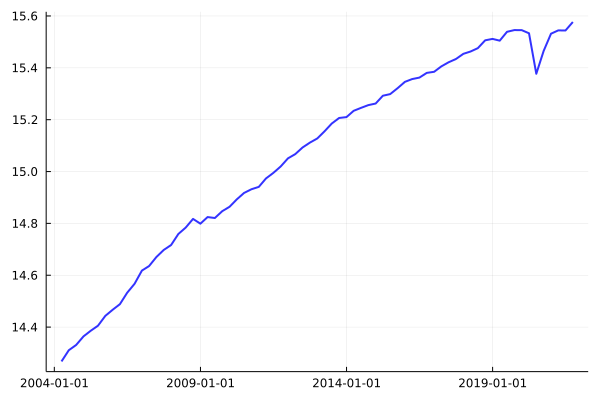

In [63]:
Plots.plot(date_sa, log_gdp, legend = false, lw = 2, color = :blue, alpha = 0.8)

You will see that the scale on the y-axis has changed after this transformation. 

The slope of this graph indicates the growth rate. 

We can also plot some of the other variables in our dataset, such as the inflation rate. 

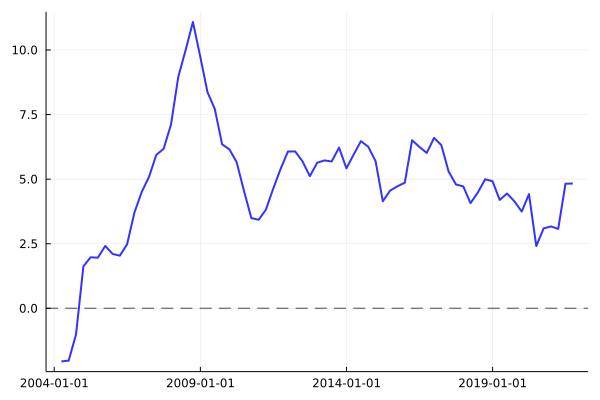

In [64]:
inflation_rate = sa_data.inflation
Plots.plot(date_sa, inflation_rate, legend = false, lw = 2, color = :blue, alpha = 0.8)
Plots.plot!([0], legend = false, lw = 1.5, seriestype = :hline, color = :black, ls = :dash, alpha = 0.5)

## Filter and subset

Just as with `R` we can select rows and columns within DataFrames. 

The `filter` command is one that you have encountered before. 

`subset` performs a similar function to `filter`. 

We can filter rows by using the following structure, 

`filter(source => f::Function, df)`

This might seem a bit strange at first, since it is different than the `R` implementation.

In this setting we first need to create a function and apply that function to the DataFrame. 

Let us illustrate with an example. 

Say that we want all the rows where the repo rate is greater than 10%. 

First we create the function `repo_geq_ten()`. 

In [75]:
repo_geq_ten(repo_rate::Number) = repo_rate >= 10

repo_geq_fifteen (generic function with 1 method)

Then we impose this condition together with the `filter` command. 

In [76]:
filter(:repo => repo_geq_ten, sa_data)

,date,gdp,repo,cpi,inflation
,Date,Int64,Float64,Float64,Float64
1,2007-12-31,2462412,10.6667,59.2646,7.11589
2,2008-03-31,2569803,11.0,60.9667,8.96234
3,2008-06-30,2633146,11.6667,62.6333,9.98761
4,2008-09-30,2723120,12.0,64.6,11.0829
5,2008-12-31,2673514,11.8333,65.0333,9.73391
6,2009-03-31,2742517,10.5,66.0667,8.36523
